In [93]:
# TASK 1 - Credit Scoring Model
# TASK 3 - Handwritten Character Recognition
# TASK 4 - Disease Prediction from Medical Data

# <h><center><b>**CodeAlpha Internship Program**</b></center></h>
### <h><center><b>**TASK 1 - Credit Scoring Model**</b></center></h>

**GitHub Repository-** **https://github.com/anweshabose/CodeAlpha_Credit_Scoring_Model**

<h1><b>Credit Scoring Model</b></h1>

![](https://thumbs.dreamstime.com/b/person-looking-rejected-loan-application-stressed-181837986.jpg)

# **Wait! Have you Verified your Borrower's Credit History before approving the Loan?**
#### **Forecast their Financial Ability so that you Don't have to Repent Later**

# **Introduction**

Predicting Borrowrers Credit Score is very essential. It is important to check Borrowers Creditworthiness before lending out a person. It is done just for maintaining own Financial security to ensure whether I will get my money back or not. It needs a rigorous check on the credit history of borrowrer.

Machine learning has significantly enhanced credit score prediction by automating data processing and improving accuracy through statistical algorithms. Additionally, feature engineering—such as computing mean values for missing data—plays a crucial role in refining predictive accuracy.

Here, we have simply trained the model with some previous historical data and also checked the model's accuracy. We have used four different algorithms Logistic Regression, KNN Classifier, Decision Tree Classifier, Random Forest Classifier to train the model. Out of four algorithms, the best algorithm, that is whose accuracy is maximum, is used for predicting new data. So, there is an obvious 90% chance that it will provide the accurate result.

# **Project Outline**

**Steps that we follow:**

- Installing and importing all the required libraries.
- Importing the csv file.
- Data Description.
- Data Processing
- i) Data Processing - Finding and filling Missing Values
- ii) Data Processing - Ordinal Encoding
- iii) Data Processing - One-Hot Encoding
- Exploratory Data Analysis (EDA)
- Feature Scaling
- Prepare the Dataset for ML Training
- Model 1: Logistic Regression
- Model 2: KNN Classifier
- Model 3: SVM
- Model 4: Naive Bayes
- Model 5: Decision Tree Classifier
- Model 6: Random Forest Classifier
- Evaluate the Best Model (Performance Evaluation)   [Done in two different processes]
- Encoded values: Make Predictions on New Data (1)
- Original values: Make Predictions on New Data (2)
- Summary

# Installing and importing all the required libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Importing the CSV file

In [98]:
df = pd.read_csv("loan.csv")

In [99]:
df.drop(df.columns.difference(['loan_amnt','term','installment','int_rate','grade','emp_length','home_ownership',
'annual_inc','verification_status','loan_status','total_rec_late_fee','total_pymnt','purpose']),axis=1, inplace=True)

In [100]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_late_fee
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,5861.071414,0.00
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1008.710000,0.00
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,3003.653644,0.00
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,12226.302210,16.97
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other,3242.170000,0.00


# Data Description

**Here are the complete names of the columns of heart disease prediction dataset:**

- `loan_amnt` – The amount requested by the borrower.
- `term` – Duration of the loan (e.g., "36 months" or "60 months").
- `int_rate` – Interest rate applied to the loan.
- `installment` – Monthly repayment amount.
- `grade` – Loan risk grade assigned (e.g., A, B, C, D).
- `emp_length` – Length of employment (e.g., "10+ years", "<1 year").
- `home_ownership` – Ownership status (e.g., "Mortgage", "Rent", "Own").
- `annual_inc` – Borrower's annual income.
- `verification_status` – Indicates if income was verified.
- `loan_status` – Current loan status (e.g., "Fully Paid", "Charged Off", "Late").
- `purpose` – Loan category (e.g., "Debt Consolidation", "Home Improvement").
- `total_pymnt` – Total amount paid by borrower.
- `total_rec_late_fee` – Total late fees paid.

In [101]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,total_pymnt,total_rec_late_fee
count,1682.000000,1682.000000,1682.000000,1679.000000,1682.000000,1682.000000
mean,12843.311534,12.896974,367.703312,62429.065068,13489.805941,1.076087
std,7687.107496,3.942635,202.296782,35230.050621,8888.326115,6.474320
min,1000.000000,6.030000,32.580000,12000.000000,0.000000,0.000000
25%,7000.000000,9.910000,217.345000,40000.000000,6776.117500,0.000000
50%,12000.000000,12.690000,335.450000,55000.000000,11786.911345,0.000000
75%,17000.000000,15.960000,475.522500,75000.000000,18005.086630,0.000000
max,35000.000000,24.110000,1243.850000,525000.000000,49153.119410,94.480000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            1682 non-null   int64  
 1   term                 1682 non-null   object 
 2   int_rate             1682 non-null   float64
 3   installment          1682 non-null   float64
 4   grade                1682 non-null   object 
 5   emp_length           1636 non-null   object 
 6   home_ownership       1682 non-null   object 
 7   annual_inc           1679 non-null   float64
 8   verification_status  1682 non-null   object 
 9   loan_status          1682 non-null   object 
 10  purpose              1682 non-null   object 
 11  total_pymnt          1682 non-null   float64
 12  total_rec_late_fee   1682 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 171.0+ KB


In [103]:
df.shape

(1682, 13)

# Data Processing

# i) Data Processing - Finding and filling Missing Values

In [104]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_length             46
home_ownership          0
annual_inc              3
verification_status     0
loan_status             0
purpose                 0
total_pymnt             0
total_rec_late_fee      0
dtype: int64

In [105]:
df.annual_inc.fillna(0, inplace = True)

In [106]:
df.emp_length.fillna('0 years', inplace = True)

In [107]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
total_pymnt            0
total_rec_late_fee     0
dtype: int64

### Thus, all the Missing values are successfully handled.

# ii) Data Processing - Ordinal Encoding
### Purpose of Ordinal Encoding: Used for categorical variables that have a natural order (e.g., education level, customer satisfaction ratings).

In [108]:
df["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', '0 years'],
      dtype=object)

In [109]:
ord_encoder = OrdinalEncoder(categories = [['0 years', '< 1 year', '1 year', '2 years', '3 years', '4 years', 
'5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']])
df["emp_length"] = ord_encoder.fit_transform(df[["emp_length"]])
df.head(2)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_late_fee
0,5000,36 months,10.65,162.87,B,11.0,RENT,24000.0,Verified,Fully Paid,credit_card,5861.071414,0.0
1,2500,60 months,15.27,59.83,C,1.0,RENT,30000.0,Source Verified,Charged Off,car,1008.710000,0.0


In [110]:
df["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [111]:
ord_encoder = OrdinalEncoder(categories = [['G', 'F', 'E', 'D', 'C', 'B', 'A']])
df["grade"] = ord_encoder.fit_transform(df[["grade"]])
df.head(2)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_late_fee
0,5000,36 months,10.65,162.87,5.0,11.0,RENT,24000.0,Verified,Fully Paid,credit_card,5861.071414,0.0
1,2500,60 months,15.27,59.83,4.0,1.0,RENT,30000.0,Source Verified,Charged Off,car,1008.710000,0.0


In [112]:
df["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

In [113]:
ord_encoder = OrdinalEncoder(categories = [['RENT', 'MORTGAGE', 'OWN']])
df["home_ownership"] = ord_encoder.fit_transform(df[["home_ownership"]])
df.head(2)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_late_fee
0,5000,36 months,10.65,162.87,5.0,11.0,0.0,24000.0,Verified,Fully Paid,credit_card,5861.071414,0.0
1,2500,60 months,15.27,59.83,4.0,1.0,0.0,30000.0,Source Verified,Charged Off,car,1008.710000,0.0


In [114]:
df["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [115]:
ord_encoder = OrdinalEncoder(categories = [['Not Verified', 'Source Verified', 'Verified']])
df["verification_status"] = ord_encoder.fit_transform(df[["verification_status"]])
df.head(2)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_late_fee
0,5000,36 months,10.65,162.87,5.0,11.0,0.0,24000.0,2.0,Fully Paid,credit_card,5861.071414,0.0
1,2500,60 months,15.27,59.83,4.0,1.0,0.0,30000.0,1.0,Charged Off,car,1008.710000,0.0


In [116]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period'], dtype=object)

In [117]:
ord_encoder = OrdinalEncoder(categories = [["Charged Off", "Default", "Late (31-120 days)", 
"In Grace Period", "Current", "Fully Paid"]])
df["loan_status"] = ord_encoder.fit_transform(df[["loan_status"]])
df.head(2)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_late_fee
0,5000,36 months,10.65,162.87,5.0,11.0,0.0,24000.0,2.0,5.0,credit_card,5861.071414,0.0
1,2500,60 months,15.27,59.83,4.0,1.0,0.0,30000.0,1.0,0.0,car,1008.710000,0.0


In [118]:
df["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy'],
      dtype=object)

In [119]:
ord_encoder = OrdinalEncoder(categories = [["debt_consolidation", "home_improvement", "major_purchase",
"credit_card", "car", "small_business", "house", "medical", "moving", "wedding", "vacation", "renewable_energy", "other"]])
df["purpose"] = ord_encoder.fit_transform(df[["purpose"]])
df.head(2)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_late_fee
0,5000,36 months,10.65,162.87,5.0,11.0,0.0,24000.0,2.0,5.0,3.0,5861.071414,0.0
1,2500,60 months,15.27,59.83,4.0,1.0,0.0,30000.0,1.0,0.0,4.0,1008.710000,0.0


### Thus, all categorical columns are successfully labled rank-wise.

# iii) Data Processing - One-Hot Encoding
### Purpose of One-Hot Encoding: Used for categorical variables that have no inherent order (e.g., colors, cities, product categories).

In [120]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [121]:
ohe_encoder = OneHotEncoder()

ohe_encoded = ohe_encoder.fit_transform(df[["term"]]).toarray()

encoder_df = pd.DataFrame(ohe_encoded, columns = ohe_encoder.get_feature_names_out())

df = pd.concat([df, encoder_df], axis = 1)

df.drop('term', axis=1, inplace=True)

df.head(2)

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_late_fee,term_ 36 months,term_ 60 months
0,5000,10.65,162.87,5.0,11.0,0.0,24000.0,2.0,5.0,3.0,5861.071414,0.0,1.0,0.0
1,2500,15.27,59.83,4.0,1.0,0.0,30000.0,1.0,0.0,4.0,1008.710000,0.0,0.0,1.0


### Thus all categorical columns that have no inherent order are successfully handled.

In [122]:
df.head(6)

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_late_fee,term_ 36 months,term_ 60 months
0,5000,10.65,162.87,5.0,11.0,0.0,24000.0,2.0,5.0,3.0,5861.071414,0.00,1.0,0.0
1,2500,15.27,59.83,4.0,1.0,0.0,30000.0,1.0,0.0,4.0,1008.710000,0.00,0.0,1.0
2,2400,15.96,84.33,4.0,11.0,0.0,12252.0,0.0,5.0,5.0,3003.653644,0.00,1.0,0.0
3,10000,13.49,339.31,4.0,11.0,0.0,49200.0,1.0,5.0,12.0,12226.302210,16.97,1.0,0.0
4,3000,12.69,67.79,5.0,2.0,0.0,80000.0,1.0,4.0,12.0,3242.170000,0.00,0.0,1.0
5,5000,7.90,156.46,6.0,4.0,0.0,36000.0,1.0,5.0,9.0,5631.377753,0.00,1.0,0.0


# Exploratory Data Analysis (EDA)

In [123]:
df.corr()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_late_fee,term_ 36 months,term_ 60 months
loan_amnt,1.000000,0.325166,0.906605,-0.326900,0.115307,0.094056,0.395293,0.493333,-0.070541,-0.200162,0.859723,0.083730,-0.479361,0.479361
int_rate,0.325166,1.000000,0.241933,-0.965466,0.020631,-0.060227,0.108264,0.257193,-0.211592,-0.044954,0.282843,0.044546,-0.548117,0.548117
installment,0.906605,0.241933,1.000000,-0.239984,0.095738,0.068752,0.381683,0.431147,-0.010959,-0.215485,0.852696,0.078906,-0.176392,0.176392
grade,-0.326900,-0.965466,-0.239984,1.000000,-0.035659,0.042805,-0.116522,-0.257067,0.199482,0.041619,-0.285372,-0.042110,0.547707,-0.547707
emp_length,0.115307,0.020631,0.095738,-0.035659,1.000000,0.137106,0.110726,0.040276,0.000382,-0.055461,0.104485,-0.007288,-0.052137,0.052137
home_ownership,0.094056,-0.060227,0.068752,0.042805,0.137106,1.000000,0.152972,0.062375,0.056825,0.004573,0.091718,0.013461,-0.050039,0.050039
annual_inc,0.395293,0.108264,0.381683,-0.116522,0.110726,0.152972,1.000000,0.202176,0.045274,0.004944,0.347879,0.098142,-0.118750,0.118750
verification_status,0.493333,0.257193,0.431147,-0.257067,0.040276,0.062375,0.202176,1.000000,-0.024934,-0.090345,0.444644,-0.002425,-0.324748,0.324748
loan_status,-0.070541,-0.211592,-0.010959,0.199482,0.000382,0.056825,0.045274,-0.024934,1.000000,-0.017492,0.262534,-0.106926,0.218277,-0.218277
purpose,-0.200162,-0.044954,-0.215485,0.041619,-0.055461,0.004573,0.004944,-0.090345,-0.017492,1.000000,-0.211589,-0.002403,0.047096,-0.047096


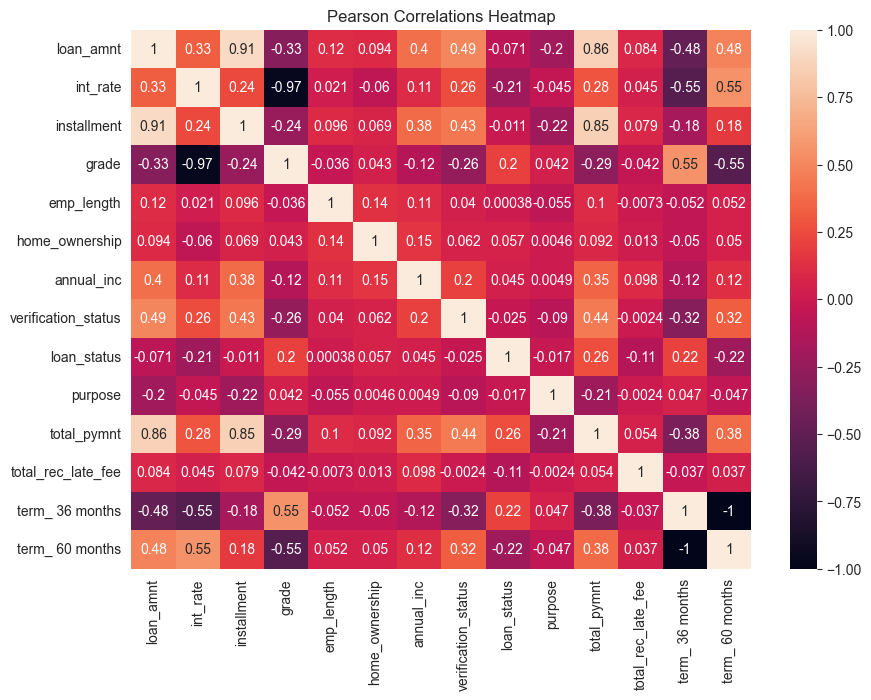

In [124]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True).set_title("Pearson Correlations Heatmap")
plt.show()

In [125]:
df1 = pd.read_csv("loan.csv")
df1.drop(df1.columns.difference(['loan_amnt','term','installment','int_rate','grade','emp_length','home_ownership',
'annual_inc','verification_status','loan_status','total_rec_late_fee','total_pymnt','purpose']),axis=1, inplace=True)

In [126]:
df1.loan_status.value_counts()
# Loan_Dataframe.encoded_loan_status.value_counts()

loan_status
Fully Paid            1215
Charged Off            295
Current                166
Late (31-120 days)       3
In Grace Period          2
Default                  1
Name: count, dtype: int64

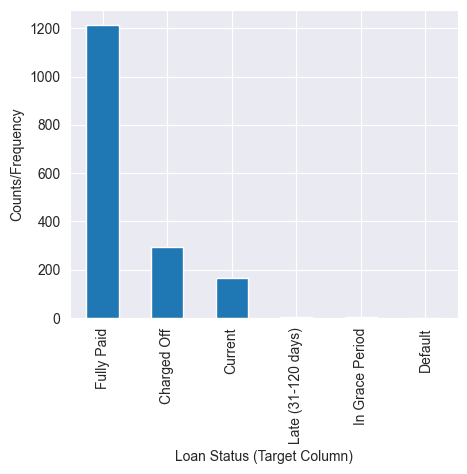

In [127]:
plt.figure(figsize = (5, 4))
df1.loan_status.value_counts().plot(kind = "bar")
plt.xlabel("Loan Status (Target Column)")
plt.ylabel("Counts/Frequency")
plt.show()
# Loan_Dataframe.encoded_loan_status.value_counts().plot(kind = "bar")

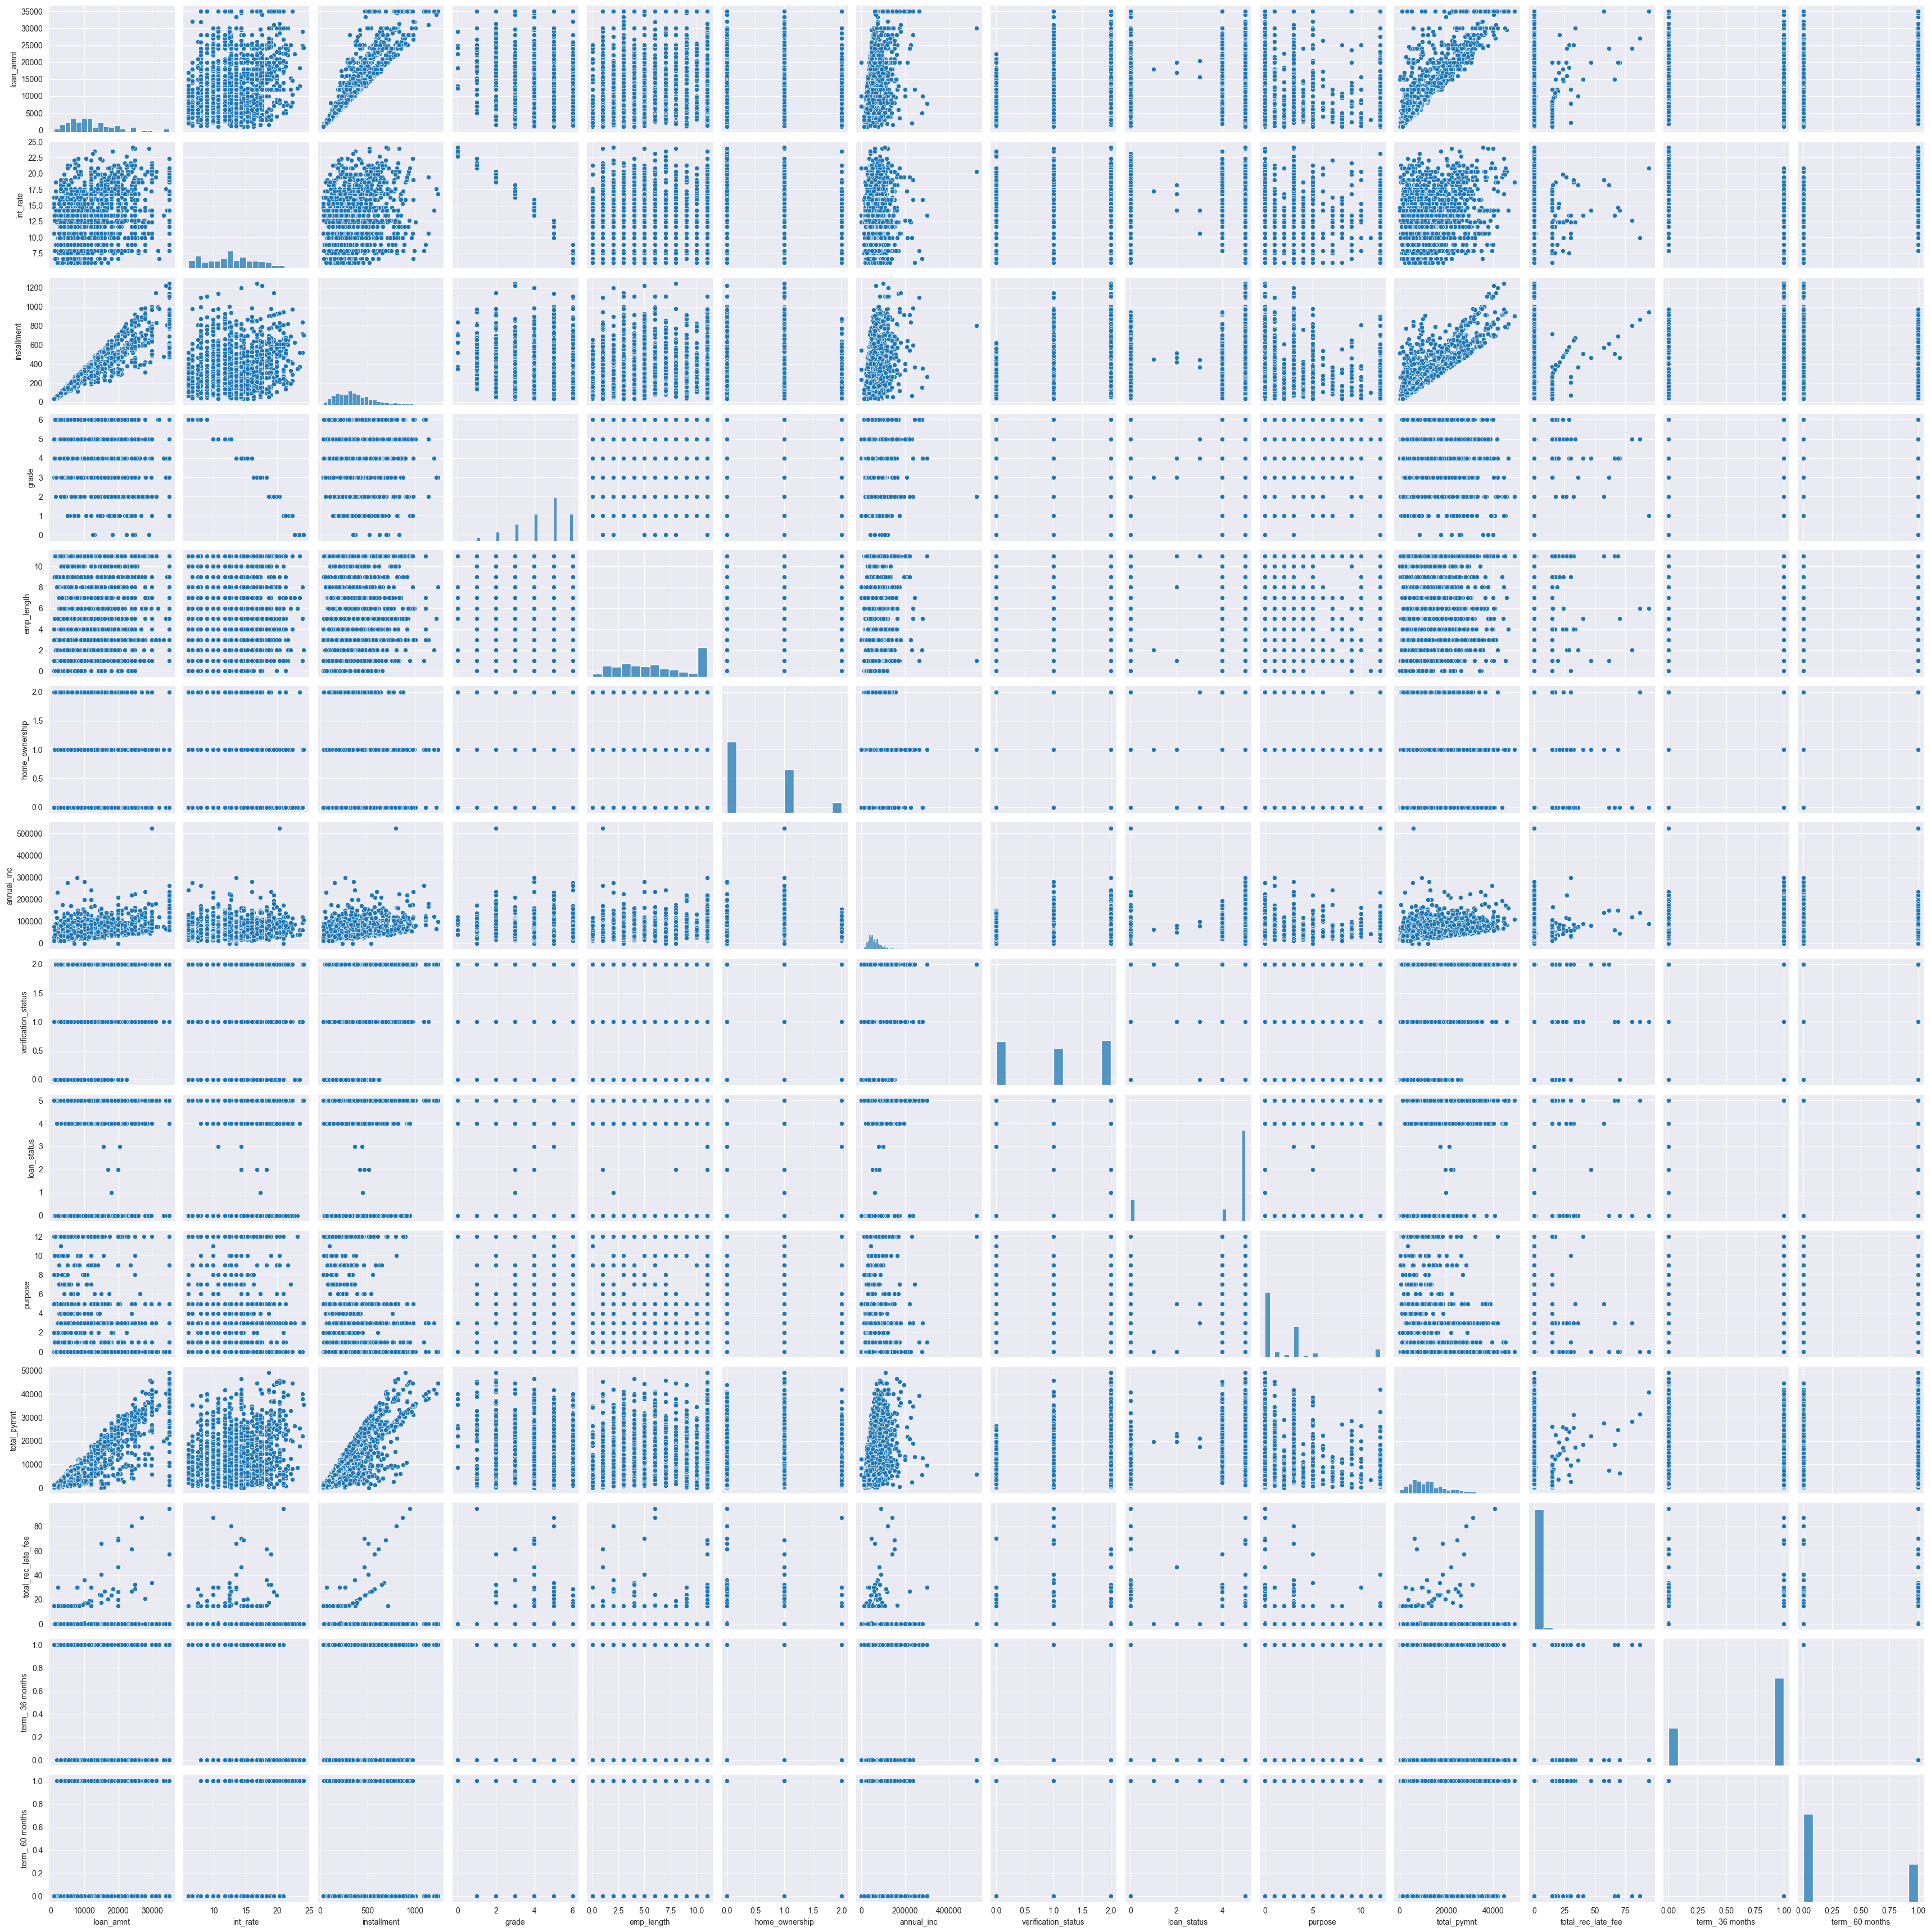

In [128]:
# UNIVERIATE, BIVARIATE & MULTIVARIATE ANALYSIS
sns.pairplot(df)

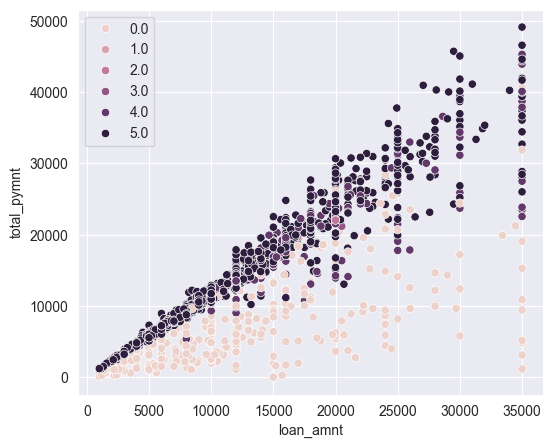

In [129]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['loan_amnt'], y=df['total_pymnt'], hue=df['loan_status'])
plt.legend()
plt.show()

# Feature Scaling
Feature Scaling is a technique used in machine learning to normalize or standardize numerical data so that features are on a similar scale.

In [130]:
# Standardizes the features by subtracting the mean and dividing by the standard deviation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('loan_status', axis=1))  
# Target variable should be excluded from scaling

In [131]:
X = pd.DataFrame(scaled_features, columns=df.drop(columns=["loan_status"]).columns)  # X: Independent variable
y = df["loan_status"]   # y: Dependent variable

# Prepare the Dataset for ML Training
Preparing the dataset is essential because we don't have to train the entire dataset. Maximum part of the dataset will be used for training and remaining part will be used for testing the accuracy. 
If Accuracy is not met then we have to tune the model or else we have to change the algorithm.

In [132]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
print(df.shape)
print(X_train.shape)
print(y_train.shape)

(1682, 14)
(1345, 13)
(1345,)


# **Model 1: Logistic Regression**

In [134]:
# Model Training: Here, we are training the model with X_train and y_train
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [135]:
# Predicting the trained-model on X_test to get the predicted values of y.
logistic_y_preds = log_model.predict(X_test)

In [136]:
# Logistic accuracy score: checking whether predicted values of y is equal to Actual values of y.
log_accuracy = accuracy_score(y_test, logistic_y_preds)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

Logistic Regression Accuracy: 0.89


### Accuracy: 0.89 means there is 89% match between Actual values of y and Predicted values of y.

In [137]:
print("Classification Report of Logistic Regression:")
print(classification_report(y_test, logistic_y_preds))

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82        67
         2.0       0.00      0.00      0.00         0
         4.0       0.62      0.72      0.67        29
         5.0       0.93      0.95      0.94       241

    accuracy                           0.89       337
   macro avg       0.62      0.60      0.61       337
weighted avg       0.90      0.89      0.89       337



In [138]:
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_y_preds))

Confusion Matrix:
 [[ 49   1   5  12]
 [  0   0   0   0]
 [  1   1  21   6]
 [  3   0   8 230]]


# **Model 2: KNN Classifier**

In [139]:
# Model Training: Here, we are training the model with X_train and y_train
KNN_model = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',n_neighbors=11,weights='uniform')
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [140]:
# Predicting the trained-model on X_test to get the predicted values of y.
KNN_y_preds=KNN_model.predict(X_test)

In [141]:
# KNN accuracy score: checking whether predicted values of y is equal to Actual values of y.
KNN_accuracy = accuracy_score(y_test, KNN_y_preds)
print(f"KNN Accuracy: {KNN_accuracy:.2f}")

KNN Accuracy: 0.74


### Accuracy: 0.74 means there is 74% match between Actual values of y and Predicted values of y.

In [142]:
print("Classification Report of KNN:")
print(classification_report(y_test, KNN_y_preds))

Classification Report of KNN:
              precision    recall  f1-score   support

         0.0       0.73      0.28      0.41        67
         4.0       0.32      0.41      0.36        29
         5.0       0.80      0.90      0.85       241

    accuracy                           0.74       337
   macro avg       0.62      0.53      0.54       337
weighted avg       0.74      0.74      0.72       337



In [143]:
print("Confusion Matrix:\n", confusion_matrix(y_test, KNN_y_preds))

Confusion Matrix:
 [[ 19   5  43]
 [  4  12  13]
 [  3  20 218]]


# **Model 3: SVM**

In [144]:
# Model Training: Here, we are training the model with X_train and y_train
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [145]:
# Predicting the trained-model on X_test to get the predicted values of y.
svm_y_preds = svm_model.predict(X_test)

In [146]:
# SVM accuracy score: checking whether predicted values of y is equal to Actual values of y.
svm_accuracy = accuracy_score(y_test, svm_y_preds)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.83


### Accuracy: 0.85 means there is 85% match between Actual values of y and Predicted values of y.

In [147]:
print("Classification Report of SVM:")
print(classification_report(y_test, svm_y_preds))

Classification Report of SVM:
              precision    recall  f1-score   support

         0.0       0.95      0.54      0.69        67
         4.0       0.47      0.31      0.38        29
         5.0       0.84      0.97      0.90       241

    accuracy                           0.83       337
   macro avg       0.75      0.61      0.65       337
weighted avg       0.83      0.83      0.81       337



In [148]:
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_preds))

Confusion Matrix:
 [[ 36   4  27]
 [  1   9  19]
 [  1   6 234]]


# **Model 4: Naive Bayes**

In [149]:
# Model Training: Here, we are training the model with X_train and y_train
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [150]:
# Predicting the trained-model on X_test to get the predicted values of y.
nb_y_preds = nb_model.predict(X_test)

In [151]:
# Naive Bayes accuracy score: checking whether predicted values of y is equal to Actual values of y.
nb_accuracy = accuracy_score(nb_y_preds, y_test)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

Naive Bayes Accuracy: 0.66


### Accuracy: 0.85 means there is 85% match between Actual values of y and Predicted values of y.

In [152]:
print("Classification Report of Naive Bayes:")
print(classification_report(y_test, nb_y_preds))

Classification Report of Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.33      0.07      0.12        67
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.28      0.86      0.42        29
         5.0       0.84      0.80      0.82       241

    accuracy                           0.66       337
   macro avg       0.29      0.35      0.27       337
weighted avg       0.69      0.66      0.65       337



In [153]:
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_y_preds))

Confusion Matrix:
 [[  5   0   1  25  36]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  2   1   1  25   0]
 [  8   0   1  39 193]]


# **Model 5: Decision Tree Classifier**

In [154]:
# Model Training: Here, we are training the model with X_train and y_train
Decision_Tree_model = DecisionTreeClassifier(random_state=42)
Decision_Tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [155]:
# Predicting the trained-model on X_test to get the predicted values of y.
Decision_Tree_y_preds = Decision_Tree_model.predict(X_test)

In [156]:
# Decision_Tree accuracy score: checking whether predicted values of y is equal to Actual values of y.
Decision_Tree_accuracy = accuracy_score(y_test, Decision_Tree_y_preds)
print(f"Decision_Tree Accuracy: {Decision_Tree_accuracy:.2f}")

Decision_Tree Accuracy: 0.85


### Accuracy: 0.85 means there is 85% match between Actual values of y and Predicted values of y.

In [157]:
print("Classification Report of Decision Tree:")
print(classification_report(y_test, Decision_Tree_y_preds))

Classification Report of Decision Tree:
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77        67
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.51      0.66      0.58        29
         5.0       0.92      0.90      0.91       241

    accuracy                           0.85       337
   macro avg       0.45      0.46      0.45       337
weighted avg       0.86      0.85      0.85       337



In [158]:
print("Confusion Matrix:\n", confusion_matrix(y_test, Decision_Tree_y_preds))

Confusion Matrix:
 [[ 50   0   0   6  11]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  2   0   1  19   7]
 [ 11   1   0  12 217]]


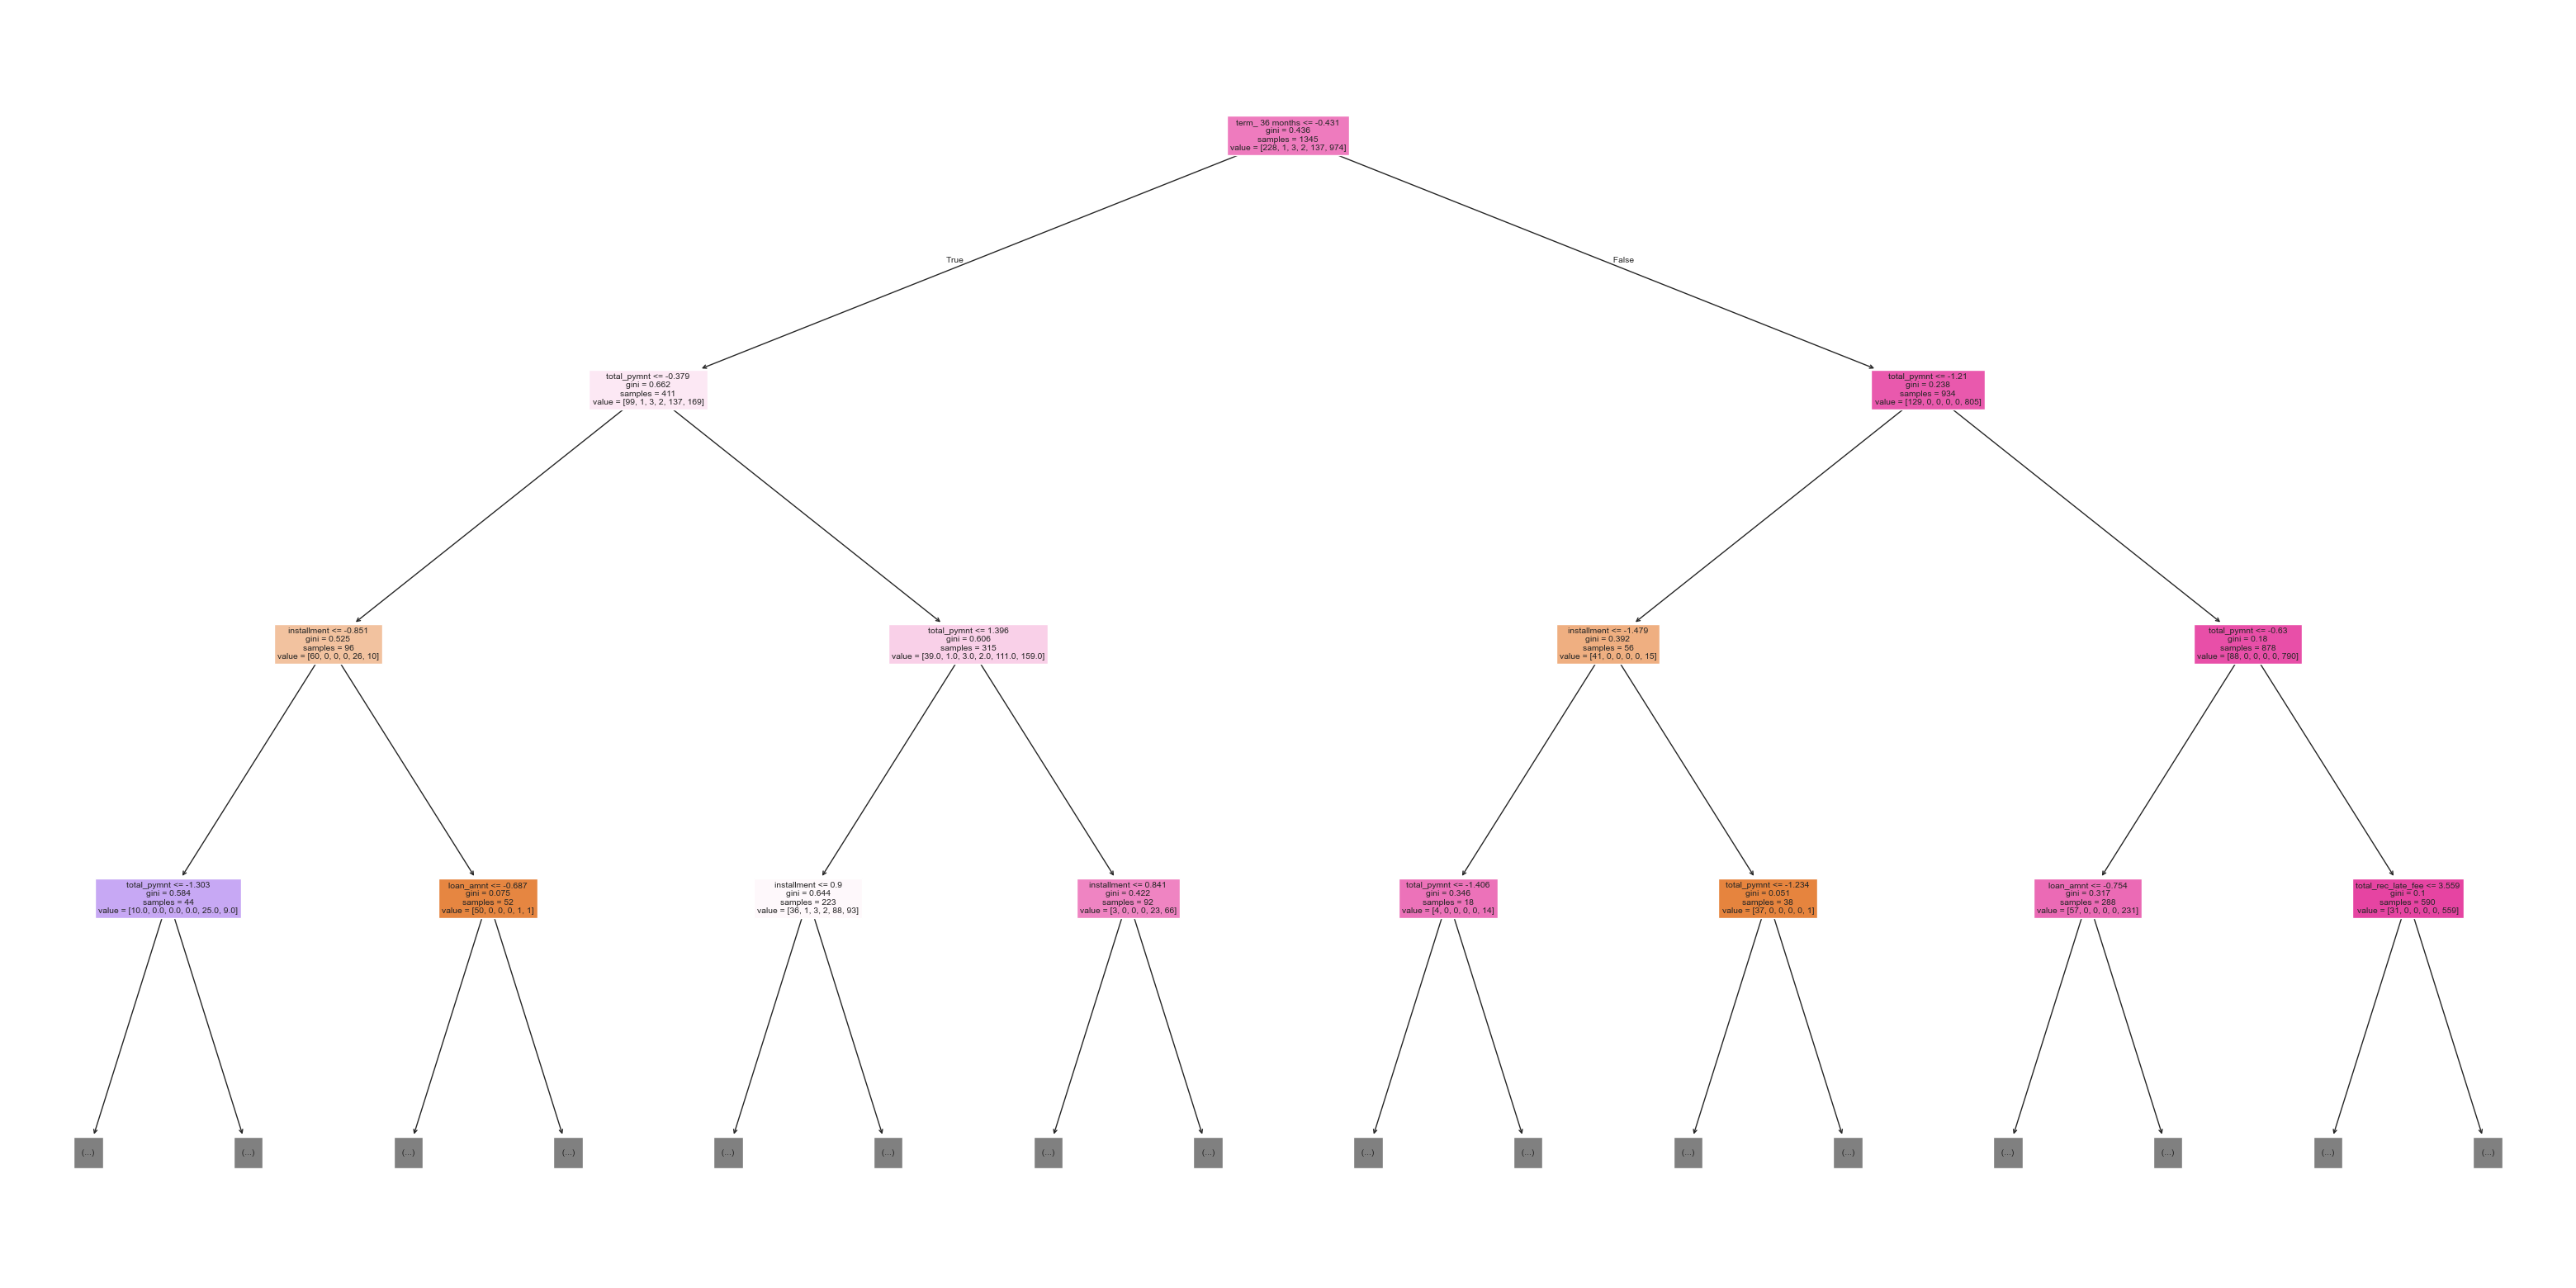

In [159]:
# Visualising the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(Decision_Tree_model, feature_names=X_train.columns, max_depth=3, filled=True)
plt.show()

# **Model 6: Random Forest Classifier**

In [160]:
# Model Training: Here, we are training the model with X_train and y_train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [161]:
# Predicting the trained-model on X_test to get the predicted values of y.
rf_y_preds = rf_model.predict(X_test)

In [162]:
# Random Forest accuracy score: checking whether predicted values of y is equal to Actual values of y.
rf_accuracy = accuracy_score(y_test, rf_y_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.86


### Accuracy: 0.85 means there is 85% match between Actual values of y and Predicted values of y.

In [163]:
print("Classification Report of Random Forest:")
print(classification_report(y_test, rf_y_preds))

Classification Report of Random Forest:
              precision    recall  f1-score   support

         0.0       0.96      0.67      0.79        67
         4.0       0.50      0.59      0.54        29
         5.0       0.89      0.95      0.92       241

    accuracy                           0.86       337
   macro avg       0.78      0.74      0.75       337
weighted avg       0.87      0.86      0.86       337



In [164]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_preds))

Confusion Matrix:
 [[ 45   7  15]
 [  0  17  12]
 [  2  10 229]]


## 1. Evaluate the Best Model (Performance Evaluation)

In [165]:
print("Accuracy Score of Logistic Regression", log_accuracy)
print("Accuracy Score of KNN", KNN_accuracy)
print("Accuracy Score of Decision Tree Classifier", Decision_Tree_accuracy)
print("Accuracy Score of Random Forest Classifier", rf_accuracy)

Accuracy Score of Logistic Regression 0.8902077151335311
Accuracy Score of KNN 0.7388724035608308
Accuracy Score of Decision Tree Classifier 0.8486646884272997
Accuracy Score of Random Forest Classifier 0.8635014836795252


In [166]:
if rf_accuracy > log_accuracy and rf_accuracy > KNN_accuracy and rf_accuracy > Decision_Tree_accuracy:
    print(" Random Forest Classifier is the Best Model" )
    best_model = rf_model
elif Decision_Tree_accuracy > log_accuracy and Decision_Tree_accuracy > KNN_accuracy and Decision_Tree_accuracy > rf_accuracy:
    print("Decision Tree is the Best Model")
    best_model = Decision_Tree_model
elif KNN_accuracy > log_accuracy and KNN_accuracy > Decision_Tree_accuracy and KNN_accuracy > rf_accuracy:
    print("KNN is the Best Model")
    best_model = KNN_model
else:
    print("Logistic Regression is the Best Model")
    best_model = log_model

Logistic Regression is the Best Model


In [167]:
if rf_accuracy > log_accuracy and rf_accuracy > KNN_accuracy and rf_accuracy > Decision_Tree_accuracy:
    best_preds = rf_y_preds
elif Decision_Tree_accuracy > log_accuracy and Decision_Tree_accuracy > KNN_accuracy and Decision_Tree_accuracy > rf_accuracy:
    best_preds = Decision_Tree_y_preds
elif KNN_accuracy > log_accuracy and KNN_accuracy > Decision_Tree_accuracy and KNN_accuracy > rf_accuracy:
    best_preds = KNN_y_preds
else:
    best_preds = logistic_y_preds

In [168]:
print("\nBest Model Metrics:")
print()
print("Accuracy Score:", accuracy_score(y_test, best_preds))
print("Precision Score:", precision_score(y_test, best_preds, average='weighted'))
print("Recall Score:", recall_score(y_test, best_preds, average='weighted'))
print("F1 Score:", f1_score(y_test, best_preds, average='weighted'))
print("Classification Report:\n", classification_report(y_test, best_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_preds))


Best Model Metrics:

Accuracy Score: 0.8902077151335311
Precision Score: 0.9001876126066067
Recall Score: 0.8902077151335311
F1 Score: 0.8924556868313581
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.73      0.82        67
         2.0       0.00      0.00      0.00         0
         4.0       0.62      0.72      0.67        29
         5.0       0.93      0.95      0.94       241

    accuracy                           0.89       337
   macro avg       0.62      0.60      0.61       337
weighted avg       0.90      0.89      0.89       337

Confusion Matrix:
 [[ 49   1   5  12]
 [  0   0   0   0]
 [  1   1  21   6]
 [  3   0   8 230]]


***Confusion Matrix***:

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

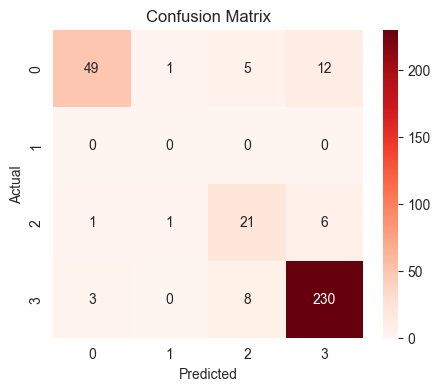

In [169]:
# Visualize Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, best_preds), annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 2. Evaluate the Best Model (Performance Evaluation)

In [170]:
accuracy_list = []
precision_list = []
f1_score_list = []
recall_list = []

In [171]:
# Logistic Regression

accuracy_list.append(accuracy_score(y_test, logistic_y_preds))
precision_list.append(precision_score(y_test, logistic_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, logistic_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, logistic_y_preds, average='weighted'))

In [172]:
# KNN

accuracy_list.append(accuracy_score(y_test, KNN_y_preds))
precision_list.append(precision_score(y_test, KNN_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, KNN_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, KNN_y_preds, average='weighted'))

In [173]:
# SVM

accuracy_list.append(accuracy_score(y_test, svm_y_preds))
precision_list.append(precision_score(y_test, svm_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, svm_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, svm_y_preds, average='weighted'))

In [174]:
# Naive Bayes

accuracy_list.append(accuracy_score(y_test, nb_y_preds))
precision_list.append(precision_score(y_test, nb_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, nb_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, nb_y_preds, average='weighted'))

In [175]:
# Decision Tree

accuracy_list.append(accuracy_score(y_test, Decision_Tree_y_preds))
precision_list.append(precision_score(y_test, Decision_Tree_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, Decision_Tree_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, Decision_Tree_y_preds, average='weighted'))

In [176]:
# Random Forest

accuracy_list.append(accuracy_score(y_test, rf_y_preds))
precision_list.append(precision_score(y_test, rf_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, rf_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, rf_y_preds, average='weighted'))

In [177]:
print(accuracy_list)
print(precision_list)
print(recall_list)
print(f1_score_list)

[0.8902077151335311, 0.7388724035608308, 0.827893175074184, 0.6617210682492581, 0.8486646884272997, 0.8635014836795252]
[0.9001876126066067, 0.7421705323869113, 0.8267586622342206, 0.693154118299607, 0.8623350759596734, 0.8730889240955869]
[0.8902077151335311, 0.7388724035608308, 0.827893175074184, 0.6617210682492581, 0.8486646884272997, 0.8635014836795252]
[0.8924556868313581, 0.7179610284648104, 0.8109838052331942, 0.6480312370178204, 0.8545125381396981, 0.8624156132938329]


In [178]:
labels = ['Logistic Reg', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']

Text(0.5, 1.0, 'F1 Score')

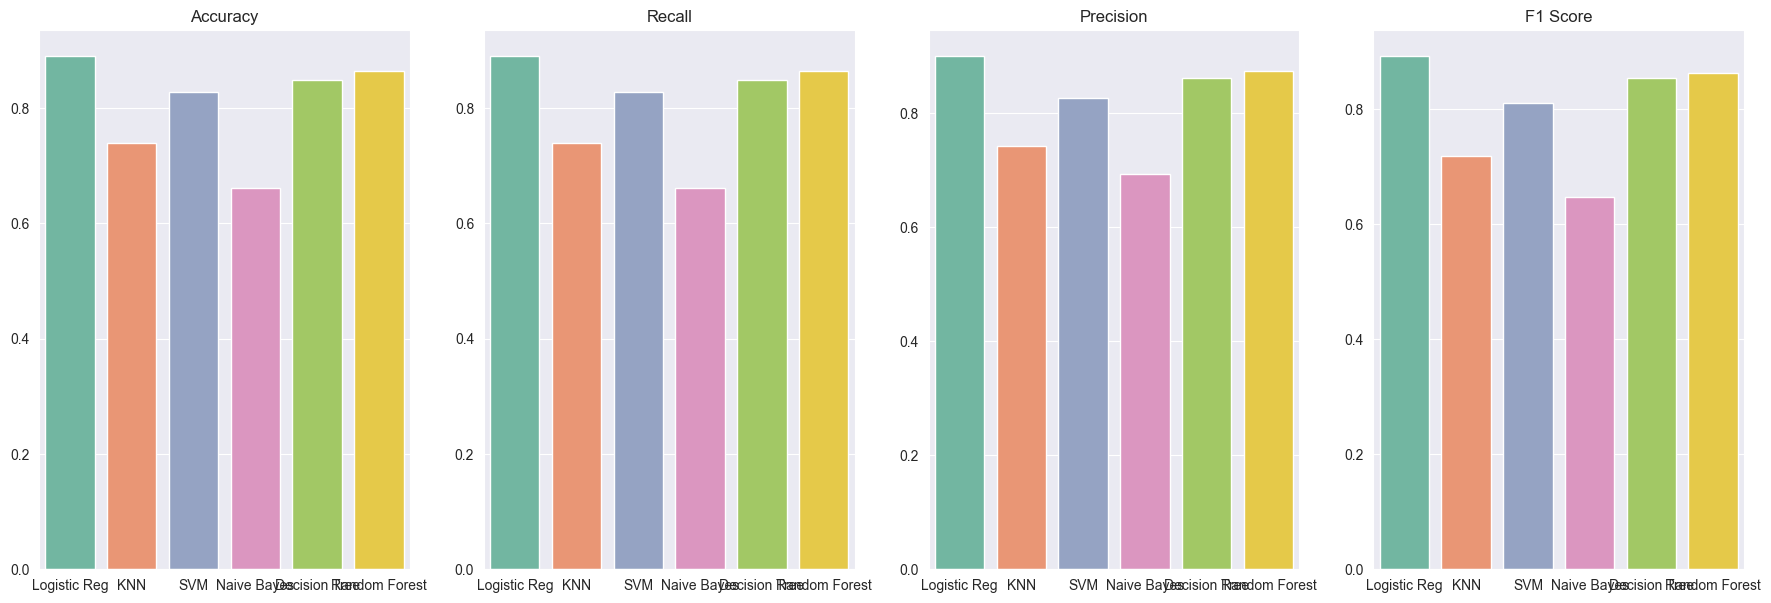

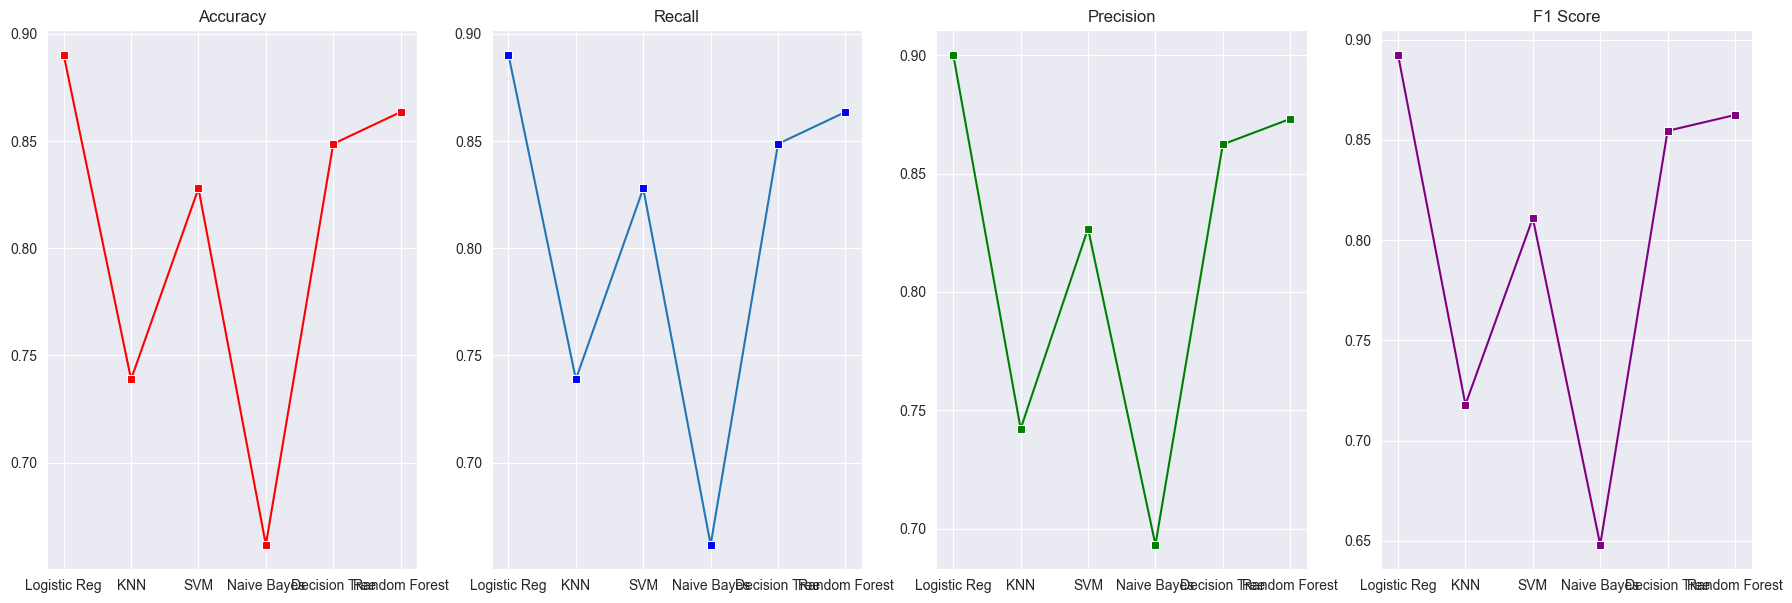

In [187]:
fig, ax = plt.subplots(1, 4, figsize = (22, 7))
sns.set_style('darkgrid')
sns.barplot(x = labels, y = accuracy_list, palette = 'Set2', ax = ax[0]).set_title("Accuracy")
sns.barplot(x = labels, y = recall_list, palette = 'Set2', ax = ax[1]).set_title("Recall")
sns.barplot(x = labels, y = precision_list, palette = 'Set2', ax = ax[2]).set_title("Precision")
sns.barplot(x = labels, y = f1_score_list, palette = 'Set2', ax = ax[3]).set_title("F1 Score")

fig, ax = plt.subplots(1, 4, figsize=(22, 7))
sns.set_style('darkgrid')
sns.lineplot(x = labels, y = accuracy_list, palette = 'Set2', ax = ax[0], marker = 's', color = 'red').set_title("Accuracy")
sns.lineplot(x = labels, y = recall_list, palette = 'Set2', ax = ax[1], marker = 's', markerfacecolor = 'blue').set_title("Recall")
sns.lineplot(x = labels, y = precision_list, palette = 'Set2', ax = ax[2], marker = 's', color = 'green').set_title("Precision")
sns.lineplot(x = labels, y = f1_score_list, palette = 'Set2', ax = ax[3], marker = 's', color = 'purple').set_title("F1 Score")

### *In conclusion, the analysis of credit risk predictions using machine learning algorithms, specifically Logistic Regression, K-Nearest Neighbors (KNN), Random Forest, and Decision Tree, has provided valuable insights into their performance. Through rigorous evaluation and comparison, it is evident that Logistic Regression emerges as the most effective algorithm among the three for predicting credit risk.*

## **1. Make Predictions on New Data (Encoded values)**
### The Data that `You` will have to enter to predict `whether you are lending the Trusted person` or not. !!

In [180]:
new_dataframe = pd.DataFrame({
    'loan_amnt': [5000],
    'int_rate': [10.65],
    'installment': [162.87],
    'grade': [2],
    'emp_length': [0],
    'home_ownership': [1],
    'annual_inc': [2000],
    'verification_status': [1],
    'purpose': [3],
    'total_pymnt': [4000],
    'total_rec_late_fee': [192],
    'term_ 36 months': [1],
    'term_ 60 months': [0],
})

In [181]:
# Scale new data
new_data_scaled = scaler.transform(new_dataframe)
prediction = best_model.predict(new_data_scaled)

In [182]:
print("Credit Score is 5 out of 5. The Borrower is much Trustworthy" if prediction == 5 
    else "Credit Score is 4 out of 5. The Borrower is less Trustworthy, but you can surely give him a chance." if prediction == 4 
    else "Credit Score is 3 out of 5. The Borrower is Not at all Trustworthy." if prediction == 3
    else "Credit Score may be 0-2 out of 5. The Borrower is Not Trustworthy")

Credit Score may be 0-2 out of 5. The Borrower is Not Trustworthy


## **2. Make Predictions on New Data (Original values)**
### The Data that `You` will have to enter to predict `whether you are lending the Trusted person` or not. !!

In [183]:
new_dataframe = pd.DataFrame({
    'loan_amnt': [5000],
    'term': ["36 months"],
    'int_rate': [10.65],
    'installment': [162.87],
    'grade': ["B"],
    'emp_length': ["10+ years"],
    'home_ownership': ["RENT"],
    'annual_inc': [24000],
    'verification_status': ["Verified"],
    'purpose': ["credit_card"],
    'total_pymnt': [5861.071414],
    'total_rec_late_fee': [0]
})
new_dataframe.head(1)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,total_pymnt,total_rec_late_fee
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000,Verified,credit_card,5861.071414,0


In [184]:
ohe_encoder = OneHotEncoder()
ohe_encoded = ohe_encoder.fit_transform(new_dataframe[["term"]]).toarray()
encoder_df = pd.DataFrame(ohe_encoded, columns = ohe_encoder.get_feature_names_out())
new_dataframe = pd.concat([new_dataframe, encoder_df], axis = 1)
new_dataframe.drop('term', axis=1, inplace=True)


ord_encoder = OrdinalEncoder(categories = [['0 years', '< 1 year', '1 year', '2 years', '3 years', '4 years', 
'5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']])
new_dataframe["emp_length"] = ord_encoder.fit_transform(new_dataframe[["emp_length"]])


ord_encoder = OrdinalEncoder(categories = [['G', 'F', 'E', 'D', 'C', 'B', 'A']])
new_dataframe["grade"] = ord_encoder.fit_transform(new_dataframe[["grade"]])


ord_encoder = OrdinalEncoder(categories = [['RENT', 'MORTGAGE', 'OWN']])
new_dataframe["home_ownership"] = ord_encoder.fit_transform(new_dataframe[["home_ownership"]])


ord_encoder = OrdinalEncoder(categories = [['Not Verified', 'Source Verified', 'Verified']])
new_dataframe["verification_status"] = ord_encoder.fit_transform(new_dataframe[["verification_status"]])


ord_encoder = OrdinalEncoder(categories = [["debt_consolidation", "home_improvement", "major_purchase",
"credit_card", "car", "small_business", "house", "medical", "moving", "wedding", "vacation", "renewable_energy", "other"]])
new_dataframe["purpose"] = ord_encoder.fit_transform(new_dataframe[["purpose"]])
new_dataframe.head(1)


,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,total_pymnt,total_rec_late_fee,term_36 months
0,5000,10.65,162.87,5.0,11.0,0.0,24000,2.0,3.0,5861.071414,0,1.0


In [185]:
# Check if the X_train and new_data columns are in same order
print("Expected Features:", X_train.columns)
print("New Data Features:", new_dataframe.columns)

Expected Features: Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'total_pymnt', 'total_rec_late_fee', 'term_ 36 months',
       'term_ 60 months'],
      dtype='object')
New Data Features: Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'total_pymnt', 'total_rec_late_fee', 'term_36 months'],
      dtype='object')


In [186]:
# Ensure new_data contains the same one-hot encoded columns as training data
missing_cols = [col for col in X_train.columns if col not in new_dataframe.columns]

# Add missing columns with default value 0 (since new_data doesn't have "60 months")
for col in missing_cols:
    new_dataframe[col] = 0

# Reorder columns to match training set
new_dataframe = new_dataframe[X_train.columns]

# Standardize the feature set (excluding the target variable)
scaled_new_data = scaler.transform(new_dataframe)

# Make predictions
prediction = log_model.predict(scaled_new_data)
print("Credit Score is 5 out of 5. The Borrower is much Trustworthy" if prediction == 5 
    else "Credit Score is 4 out of 5. The Borrower is less Trustworthy, but you can surely give him a chance." if prediction == 4 
    else "Credit Score is 3 out of 5. The Borrower is Not at all Trustworthy." if prediction == 3
    else "Credit Score may be 0-2 out of 5. The Borrower is Not Trustworthy")

Credit Score is 5 out of 5. The Borrower is much Trustworthy


# **Summary**

We downloaded, explored, performed EDA(Exploratory Data Analysis), observed for any missing values and trained few models to search the best model out of it and used that perticular model/algorithm for Credit Score Prediction.

- Total Dataset contains 1682 rows and 13 columns.
- After Data processing it has 1682 rows and 14 columns.
- Performed Exploratory Data Analysis.
- Normalized the entire Data.
- Then split the data into train data and test data.
- Training data had approximately 1345 rows and 14 columns.
- Test data had approximately 337 rows and 14 columns.
- Trained the model to perform the required Application of predicting Credit Score correctly.
- Trained four models:
`LogisticRegression`,`KNNClassifier` `DecisionTree` and `RandomForest`.
Among these performance of `LogisticRegression` was best as it gave the accuracy of 89% on the dataset.

### **Now you can also predict Credit Score of the your borrowrer before lending out just by providing few necessary Informations. 😊**

## **THANK YOU 😊**